# Grado en Ingeniería de Tecnologías y Servicios de Telecomunicación / Grado en Ingeniería Informática
### **Asignatura**: Tratamiento de Señales Visuales/Tratamiento de Señales Multimedia I
### Práctica 4: Reconocimiento de escenas con Deep Learning

---

Autor: Juan C. SanMiguel (juancarlos.sanmiguel@uam.es), Universidad Autónoma de Madrid


# Carga de conjuntos de datos/imágenes (datasets)

En este script interativo de python aprenderá a cargar datasets utilizando la API de alto nivel [Keras](https://www.tensorflow.org/api_docs/python/tf/keras) disponible para Tensorflow. En concreto analizaremos como cargar un dataset previamente almacenado en directorios del sistema de archivos y como definir iteradores que nos permitan extraer los datos para posteriormente entrenar.

Tiempo estimado para completar este script: 15 minutos

# 1.Preparación del entorno de trabajo

A continuación tiene un conjunto de instrucciones para establecer el entorno de trabajo. Verifique que la versión de Python es > 3.6  y la de Tensorflow es 2.3.0

In [1]:
#%%capture
#%tensorflow_version 2.x
!pip install tensorflow==2.3.0
import tensorflow as tf
!python --version     # mostrar version de python
print('Tensorflow ' + tf.__version__) # mostrar version tensorflow

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

     |████████████████████████████████| 320.4 MB 46 kB/s 
     |████████████████████████████████| 20.1 MB 1.3 MB/s 
     |████████████████████████████████| 2.9 MB 37.8 MB/s 
     |████████████████████████████████| 459 kB 45.9 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.7.0
    Uninstalling tensorflow-2.7.0:
 

Python 3.7.12
Tensorflow 2.3.0
Mounted at /content/gdrive



# 2.Datasets propio con split predefinido
Para datasets no disponibles por defecto en Tensorflow, también se proporciona una funcionalidad básica que permite operar rápidamente con datasets. En esta sección vamos a revisar las operaciones anteriormente comentadas para datasets almacenados en directorios del disco.



### 2.1 Descripcion Scenes15


En concreto trabajaremos con el dataset [Scenes15](http://www-vpu.eps.uam.es/~jcs/pub/scenes15.zip) que tiene las siguientes caracteristicas:
*   15 clases (Kitchen, Store, Bedroom, LivingRoom, Office, Industrial, Suburb, InsideCity, TallBuilding, Street, Highway, OpenCountry, Coast, Mountain, Forest)
*   4485 imágenes a color RGB (con resolución variada)
  *   Datos entrenamiento/train (1500) 
  *   Datos test/validation (2985).

## 2.2 Descarga
A continuación se muestran las instrucciones para descargar una partición dada (*split*) del dataset:

In [2]:
import os, subprocess

dwld_dir = '/content/gdrive/My Drive/dwld_dir'        # directorio de descarga en la unidad personal de google drive
subprocess.call(["mkdir","-p",dwld_dir+'/dataset/'])  # crear directorio para dataset
os.chdir(dwld_dir+'/dataset/')                        # posicionarse en el directorio

# Descargar dataset scenes15 si no esta disponible
if os.path.isfile('./dataset_scenes15_split.zip') == False: 
  !wget http://www-vpu.eps.uam.es/~jcs/tsv/dataset_scenes15_split.zip

# Descomprimir dataset scenes15 si no esta disponible
if os.path.isdir('./scenes15_split') == False: 
  !unzip -o -q dataset_scenes15_split.zip -d .

--2021-12-09 11:14:47--  http://www-vpu.eps.uam.es/~jcs/tsv/dataset_scenes15_split.zip
Resolving www-vpu.eps.uam.es (www-vpu.eps.uam.es)... 150.244.56.90
Connecting to www-vpu.eps.uam.es (www-vpu.eps.uam.es)|150.244.56.90|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 86464850 (82M) [application/zip]
Saving to: ‘dataset_scenes15_split.zip’

dataset_scenes15_sp 100%[===================>]  82.46M  17.0MB/s    in 15s     

2021-12-09 11:15:02 (5.42 MB/s) - ‘dataset_scenes15_split.zip’ saved [86464850/86464850]



Tras descargar y descomprimir el fichero en la carpeta *scene15*, observamos que existen dos subcarpetas:
*   Carpeta *train* con imágenes de entrenamiento
*   Carpeta *test* con imágenes de test/validacion

En cada carpeta, existirá un número de sub-carpetas acorde al número de clases del dataset. En cada carpeta existirán imágenes asociadas a cada categoría. 

Para *Scene15*, la estructura de la carpeta *train* es la siguiente:

  *Scene15/Bedroom*

  *Scene15/Coast*
  
  ...

  *Scene15/Suburb*

  *Scene15/TallBuilding*
  
Podemos visualizar las carpetas con las siguientes instrucciones:

In [3]:
!ls ./scenes15_split
!du ./scenes15_split/train -h # mostrar subdirectorios de 'train'
!du ./scenes15_split/test -h  # mostrar subdirectorios de 'test'

test  train
1.7M	./scenes15_split/train/Bedroom
871K	./scenes15_split/train/Coast
2.0M	./scenes15_split/train/Forest
781K	./scenes15_split/train/Highway
4.7M	./scenes15_split/train/Industrial
1.4M	./scenes15_split/train/InsideCity
3.7M	./scenes15_split/train/Kitchen
1.1M	./scenes15_split/train/LivingRoom
1.3M	./scenes15_split/train/Mountain
920K	./scenes15_split/train/Office
1.3M	./scenes15_split/train/OpenCountry
5.3M	./scenes15_split/train/Store
1.3M	./scenes15_split/train/Street
1.4M	./scenes15_split/train/Suburb
1.3M	./scenes15_split/train/TallBuilding
29M	./scenes15_split/train
2.2M	./scenes15_split/test/Bedroom
2.3M	./scenes15_split/test/Coast
4.5M	./scenes15_split/test/Forest
1.4M	./scenes15_split/test/Highway
9.5M	./scenes15_split/test/Industrial
2.8M	./scenes15_split/test/InsideCity
3.8M	./scenes15_split/test/Kitchen
2.2M	./scenes15_split/test/LivingRoom
3.4M	./scenes15_split/test/Mountain
1.1M	./scenes15_split/test/Office
4.0M	./scenes15_split/test/OpenCountry
12M	./scenes15_

## 2.3 Visualización 
A continuación se muestran las instrucciones para visualizar el dataset:

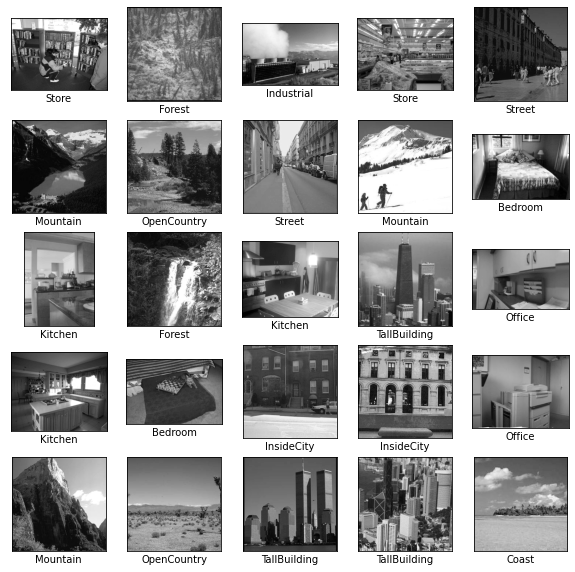

In [4]:
import pathlib, random, glob
import matplotlib.pyplot as plt
from skimage.io import imread 

train_dir = pathlib.Path(dwld_dir + '/dataset/scenes15_split/train/')
test_dir = pathlib.Path(dwld_dir + '/dataset/scenes15_split/test/')

# mostrar resultados
plt.figure(figsize=(10,10))
plt.gray()

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])    
  filename = random.choice(glob.glob(dwld_dir+'/dataset/scenes15_split/train/**/*.jpg'))
  plt.imshow(imread(filename))        
  class_name = pathlib.Path(filename).parent.resolve().relative_to(pathlib.Path(filename).resolve().parent.parent)
  plt.xlabel(class_name)    
plt.show()

## 2.4 Iterador ImageDataGenerator

Por último, debemos convertir los datos al formato requerido por Tensorflow para poder iterar sobre ellos. Para ello utilizaremos la funcionalidad ```tf.keras.preprocessing.image.ImageDataGenerator``` cuya documentación está disponible en este [enlace](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

```ImageDataGenerator``` permite:
* Definir transformaciones sobre los datos
* Agrupar los datos en *batches* para posteriormente ser utilizados en la fase de entrenamiento.

Con el siguiente código será capaz de crear este elemento y aplicarlo a los datos de entrenamiento:



In [5]:
import pathlib
import numpy as np

train_dir = pathlib.Path(dwld_dir + '/dataset/scenes15_split/train/')
test_dir = pathlib.Path(dwld_dir + '/dataset/scenes15_split/test/')

# Obtener etiquetas de clase y numero de clases
CLASS_NAMES = np.array([item.name for item in train_dir.glob('*')]) #clases son subdirectorios de '/train/'
NUM_CLASSES = len(CLASS_NAMES) # numero total de clases
 
# Crear ImageDataGenerator convirtiendo de uint8 a float32 en el rango [0,1].
img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Obtenemos un iterador sobre los datos de entrenamiento del dataset
# aplicando el ImageDataGenerator creado anteriormente
BATCH_SIZE = 16 # numero de elementos procesados conjuntamente en cada iteracion
IMG_HEIGHT = 224
IMG_WIDTH = 224
train_data_gen = img_gen.flow_from_directory(directory=str(train_dir),
                                          target_size=(IMG_HEIGHT, IMG_WIDTH),
                                          color_mode='rgb',                                                     
                                          classes = list(CLASS_NAMES),
                                          class_mode='categorical',
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)
    
# Mostrar info sobre los datos
print('Train dataset contiene {} imagenes redimensionadas a {}x{}'.format(train_data_gen.n, train_data_gen.target_size[0],train_data_gen.target_size[1]))
print('Train dataset contiene ' + str(NUM_CLASSES) + ' clases')
print('Iterador configurado con {} batches de {} imagenes' .format(train_data_gen.n/BATCH_SIZE, BATCH_SIZE))



Found 1500 images belonging to 15 classes.
Train dataset contiene 1500 imagenes redimensionadas a 224x224
Train dataset contiene 15 clases
Iterador configurado con 93.75 batches de 16 imagenes


## 2.5 Visualizar batch
Por último podemos visualizar cada *batch* con las siguientes instrucciones:

In [6]:
#funcion para mostrar los datos de cada batch
def show_batch(image_batch, label_batch, idx, CLASS_NAMES):
  fig=plt.figure(figsize=(10,10))
  for n in range(image_batch.shape[0]):
    ax = plt.subplot(image_batch.shape[0]/4,4,n+1)
    plt.imshow(image_batch[n])
    plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
    plt.axis('off')
  fig.suptitle('Batch de datos #' + str(idx)) # or plt.suptitle('Main title')
  plt.show()

# Obtenemos el siguiente batch aplicando 'next()' al iterador
batch_data, batch_label = next(train_data_gen) 
show_batch(batch_data, batch_label, 0, CLASS_NAMES)

Bmax = 3 #numero maximo de batches a mostrar
for b, batch_train_data in enumerate(train_data_gen):
  batch_data, batch_label = batch_train_data
  show_batch(batch_data, batch_label, b+1, CLASS_NAMES)
  if b > Bmax:
      break

Output hidden; open in https://colab.research.google.com to view.


# 3.Datasets propio sin split predefinido
Para datasets no disponibles por defecto en Tensorflow, también se proporciona una funcionalidad básica que permite operar rápidamente con datasets. En esta sección vamos a revisar las operaciones anteriormente comentadas para datasets almacenados en directorios del disco.

### 3.1 Descripcion Scenes15


En concreto trabajaremos con el dataset [Scenes15](http://www-vpu.eps.uam.es/~jcs/pub/scenes15.zip) que tiene las siguientes caracteristicas:
*   15 clases (Kitchen, Store, Bedroom, LivingRoom, Office, Industrial, Suburb, InsideCity, TallBuilding, Street, Highway, OpenCountry, Coast, Mountain, Forest)
*   4485 imágenes a color RGB (con resolución variada)
  *   Datos entrenamiento/train (-) 
  *   Datos test/validation (-).

## 3.2 Descarga
A continuación se muestran las instrucciones para descargar el dataset completo:

In [7]:
import os, subprocess

dwld_dir = '/content/gdrive/My Drive/dwld_dir'        # directorio de descarga en la unidad personal de google drive
subprocess.call(["mkdir","-p",dwld_dir+'/dataset/'])  # crear directorio para dataset
os.chdir(dwld_dir+'/dataset/')                        # posicionarse en el directorio

# Descargar dataset scenes15 si no esta disponible
if os.path.isfile('./dataset_scenes15.zip') == False: 
  !wget http://www-vpu.eps.uam.es/~jcs/tsv/dataset_scenes15.zip

# Descomprimir dataset scenes15 si no esta disponible
if os.path.isdir('./scenes15') == False: 
  !unzip -o -q dataset_scenes15.zip -d .

--2021-12-09 11:15:57--  http://www-vpu.eps.uam.es/~jcs/tsv/dataset_scenes15.zip
Resolving www-vpu.eps.uam.es (www-vpu.eps.uam.es)... 150.244.56.90
Connecting to www-vpu.eps.uam.es (www-vpu.eps.uam.es)|150.244.56.90|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 86359960 (82M) [application/zip]
Saving to: ‘dataset_scenes15.zip’

dataset_scenes15.zi 100%[===================>]  82.36M  19.9MB/s    in 5.3s    

2021-12-09 11:16:03 (15.7 MB/s) - ‘dataset_scenes15.zip’ saved [86359960/86359960]



## 3.3 Visualización 
A continuación se muestran las instrucciones para visualizar el dataset:

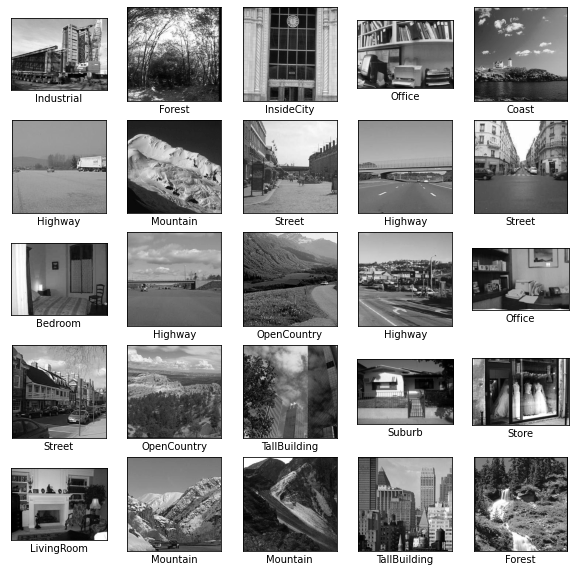

In [8]:
import pathlib, random, glob
import matplotlib.pyplot as plt
from skimage.io import imread 

dataset_dir = pathlib.Path(dwld_dir + '/dataset/scenes15/')


# mostrar resultados
plt.figure(figsize=(10,10))
plt.gray()

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])    
  filename = random.choice(glob.glob(dwld_dir+'/dataset/scenes15/**/*.jpg'))
  plt.imshow(imread(filename))        
  class_name = pathlib.Path(filename).parent.resolve().relative_to(pathlib.Path(filename).resolve().parent.parent)
  plt.xlabel(class_name)    
plt.show()

## 3.4 Iterador ImageDataGenerator

Por último, debemos convertir los datos al formato requerido por Tensorflow para poder iterar sobre ellos. Para ello utilizaremos la funcionalidad ```tf.keras.preprocessing.image.ImageDataGenerator``` cuya documentación está disponible en este [enlace](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

```ImageDataGenerator``` permite:
* Definir transformaciones sobre los datos
* Agrupar los datos en *batches* para posteriormente ser utilizados en la fase de entrenamiento.
* Diferente del caso en la sección anterior, el parámetro ```validation_split``` permite definir el porcentaje de datos que se seleccionaran para train/test. 

Posteriormente la carga de datos se realiza con la función ```flow_from_directory``` deberá indicar: 
* ```subset="training"```  para cargar los datos de entrenamiento
* ```subset="validation"``` para cargar los datos de test

Con el siguiente código será capaz de crear este elemento y aplicarlo a los datos de entrenamiento:



In [9]:
import tensorflow as tf
import pathlib
import numpy as np

dataset_dir = pathlib.Path(dwld_dir + '/dataset/scenes15/')

# Obtener etiquetas de clase y numero de clases
CLASS_NAMES = np.array([item.name for item in dataset_dir.glob('*')]) #clases son subdirectorios de '/train/'
NUM_CLASSES = len(CLASS_NAMES) # numero total de clases
 
# Crear ImageDataGenerator convirtiendo de uint8 a float32 en el rango [0,1].
img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.20)

# Obtenemos un iterador sobre los datos de entrenamiento del dataset
# aplicando el ImageDataGenerator creado anteriormente
BATCH_SIZE = 16 # numero de elementos procesados conjuntamente en cada iteracion
IMG_HEIGHT = 32
IMG_WIDTH = 32
IMG_CHANNELS = 3
train_data_gen = img_gen.flow_from_directory(directory=str(dataset_dir),
                                          target_size=(IMG_HEIGHT, IMG_WIDTH),
                                          color_mode='rgb',                                                     
                                          classes = list(CLASS_NAMES),
                                          class_mode='categorical',
                                          batch_size=BATCH_SIZE, 
                                          subset="training",                                         
                                          shuffle=True,
                                          seed=0)

test_data_gen = img_gen.flow_from_directory(directory=str(dataset_dir),
                                          target_size=(IMG_HEIGHT, IMG_WIDTH),
                                          color_mode='rgb',                                                     
                                          classes = list(CLASS_NAMES),
                                          class_mode='categorical',
                                          batch_size=BATCH_SIZE,
                                          subset="validation",
                                          shuffle=True,
                                          seed=0)

# Mostrar info sobre los datos
print('Train dataset contiene {} imagenes redimensionadas a {}x{}'.format(train_data_gen.n, train_data_gen.target_size[0],train_data_gen.target_size[1]))
print('Train dataset contiene ' + str(NUM_CLASSES) + ' clases')
print('Iterador configurado con {} batches de {} imagenes' .format(train_data_gen.n/BATCH_SIZE, BATCH_SIZE))

Found 3592 images belonging to 15 classes.
Found 893 images belonging to 15 classes.
Train dataset contiene 3592 imagenes redimensionadas a 32x32
Train dataset contiene 15 clases
Iterador configurado con 224.5 batches de 16 imagenes


## 3.5 Visualizar batch
Por último podemos visualizar cada *batch* con las siguientes instrucciones:

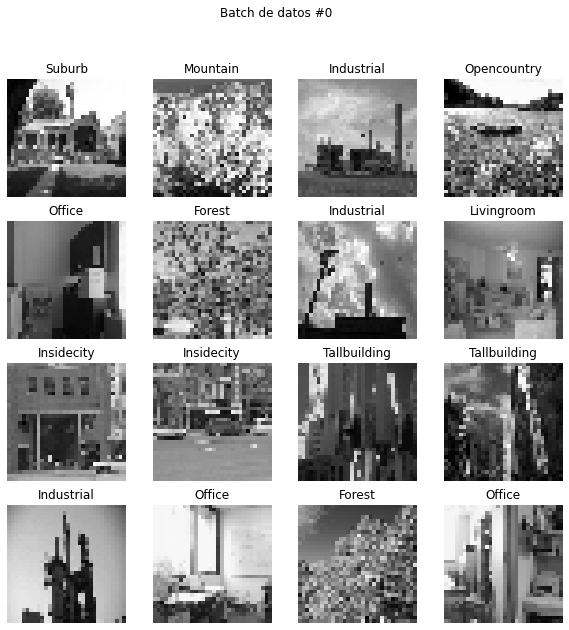

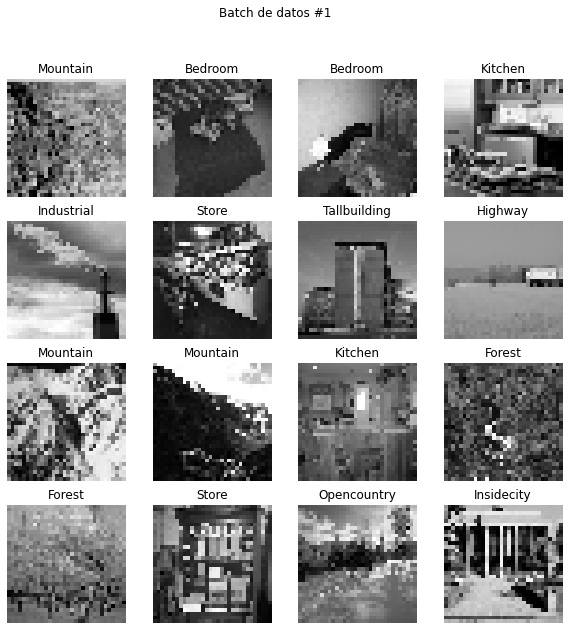

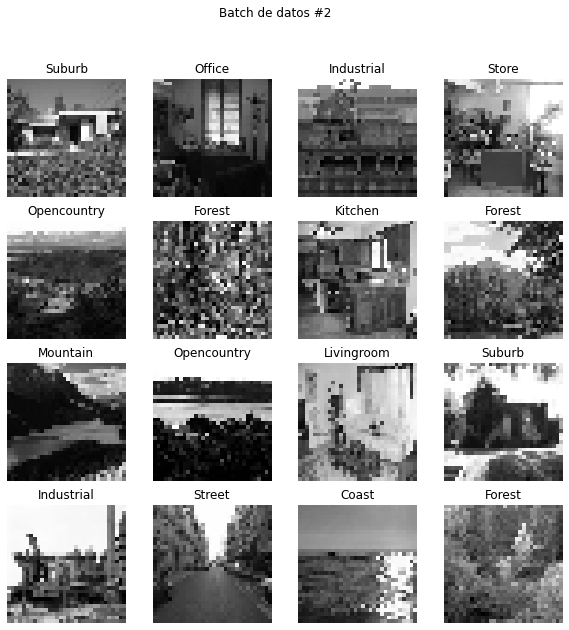

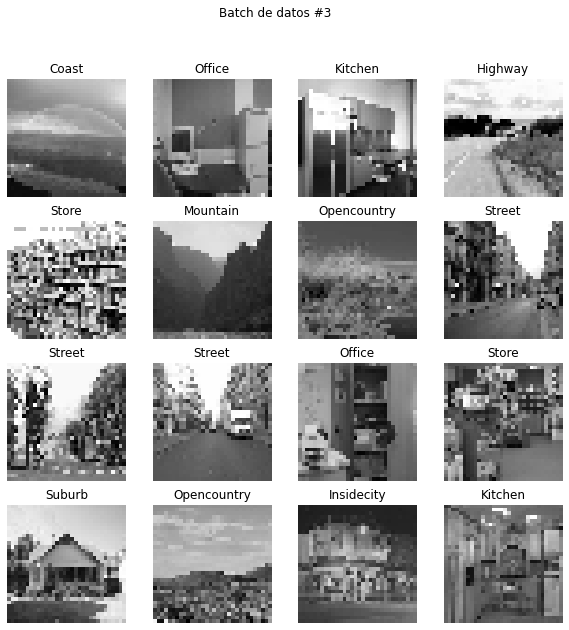

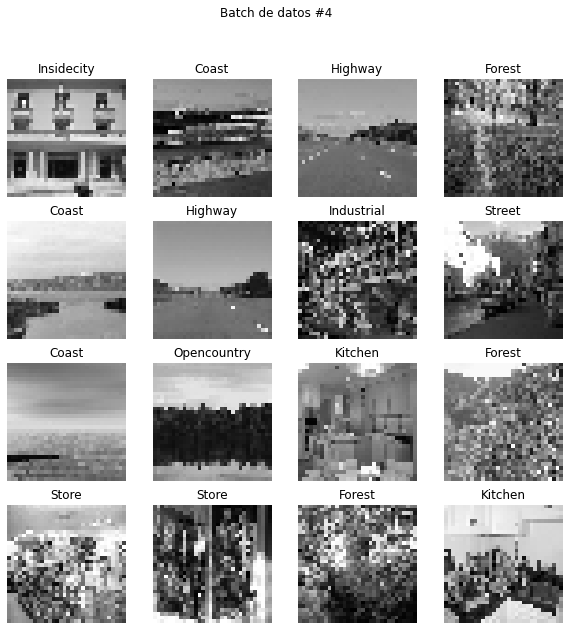

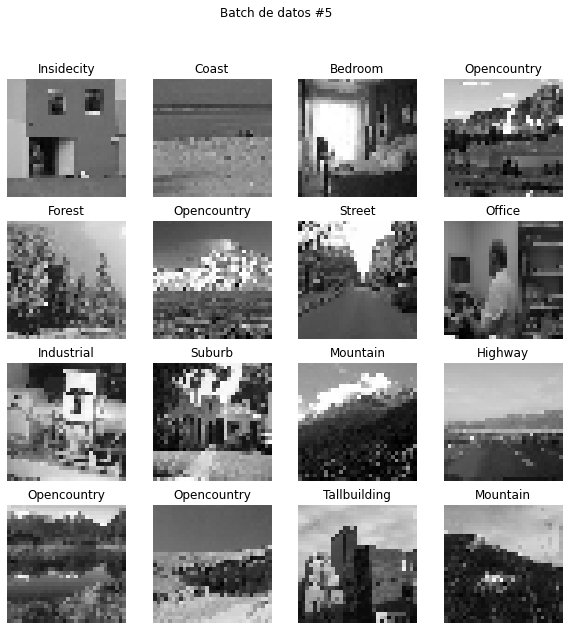

In [10]:
#funcion para mostrar los datos de cada batch
def show_batch(image_batch, label_batch, idx, CLASS_NAMES):
  fig=plt.figure(figsize=(10,10))
  for n in range(image_batch.shape[0]):
    ax = plt.subplot(image_batch.shape[0]/4,4,n+1)
    plt.imshow(image_batch[n])
    plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
    plt.axis('off')
  fig.suptitle('Batch de datos #' + str(idx)) # or plt.suptitle('Main title')
  plt.show()

# Obtenemos el siguiente batch aplicando 'next()' al iterador
batch_data, batch_label = next(train_data_gen) 
show_batch(batch_data, batch_label, 0, CLASS_NAMES)

Bmax = 3 #numero maximo de batches a mostrar
for b, batch_train_data in enumerate(train_data_gen):
  batch_data, batch_label = batch_train_data
  show_batch(batch_data, batch_label, b+1, CLASS_NAMES)
  if b > Bmax:
      break